In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [29]:
preds = "tests/predict_contrastive/preds_contrastive.txt"
preds = np.loadtxt(preds)
preds.shape

(4500,)

In [70]:
last_hidden_state = "tests/predict_contrastive/last_hidden_state_contrastive.txt"
last_hidden_state = np.loadtxt(last_hidden_state)
last_hidden_state.shape

(1536, 768)

In [83]:
last_hidden_state = np.reshape(last_hidden_state, (24, -1, 768))
last_hidden_state.shape

(24, 64, 768)

In [81]:
a = np.expand_dims(last_hidden_state, (4500, 768))

AxisError: axis 4500 is out of bounds for array of dimension 5

In [74]:
last_hidden_state.view([4500, 768])

TypeError: Field elements must be 2- or 3-tuples, got '4500'

In [82]:
feature = "tests/predict_contrastive/fin_features.txt"
feature = np.loadtxt(feature)
feature.shape

(3375000, 768)

In [156]:
feature_base = "tests/predict_base/fin_features_base.txt"
feature_base = np.loadtxt(feature_base)
feature_base.shape

(3375000, 768)

In [102]:
label = "tests/predict_contrastive/preds_contrastive.txt"
label = np.loadtxt(label)
label.shape

(4500,)

In [91]:
feature = np.reshape(feature, (4500, -1, 768))

In [158]:
feature_base = np.reshape(feature_base, (4500, -1, 768))

In [116]:
feature.shape
feature_max = np.max(feature, axis=1)

In [159]:
feature_base.shape
feature_base_max = np.max(feature_base, axis=1)

In [157]:
feature_max.shape

(4500, 768)

In [161]:
feature_base_max.shape

(4500, 768)

In [120]:
feature_max.shape
np.savetxt('contrastive_max', feature_max, fmt='%1.18f')

In [162]:
feature_max.shape
np.savetxt('base_max.txt', feature_base_max, fmt='%1.18f')

In [109]:
label

array([150., 131., 150., ...,  18., 150.,   3.])

In [155]:
test

,0,1,intent
0,-24.399885,-68.616180,150.0
1,-13.306307,-44.299175,131.0
2,2.329873,-42.163780,150.0
3,-14.250367,-44.996643,131.0
4,-32.707527,-63.937302,150.0
...,...,...,...
4495,1.650814,-53.275631,150.0
4496,-3.253706,-35.624767,60.0
4497,-2.166653,27.328777,18.0
4498,-40.435764,-54.833496,150.0


(4500, 2)


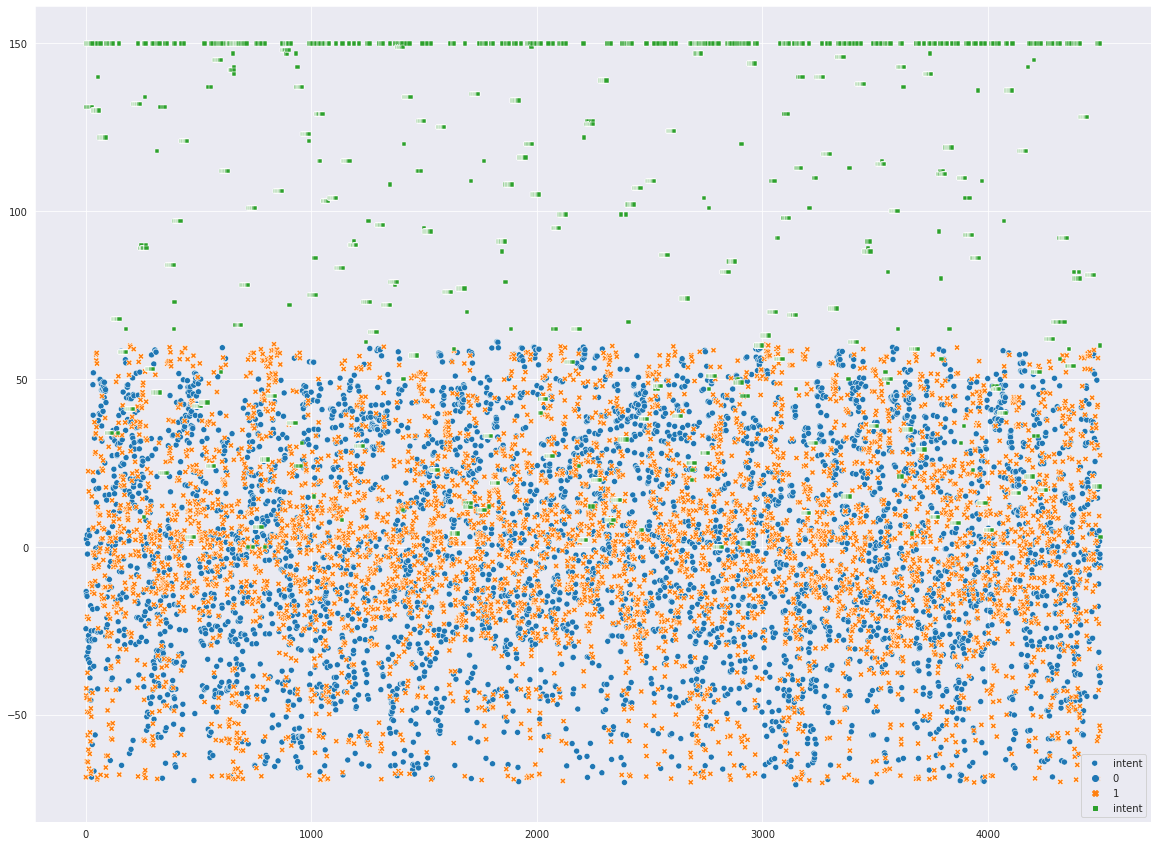

In [154]:
n_components = 2
tsne = TSNE(n_components=n_components, perplexity=40)
print(tsne.fit_transform(feature_max).shape)

positive_embed = pd.DataFrame(tsne.fit_transform(feature_max))

plt.figure(figsize=(20, 15))
fig = sns.scatterplot(data = test, label='intent')
plt.show()

In [ ]:
sns.catplot()

In [111]:
positive_embed

,0,1
0,4.741156,33.744221
1,-53.267471,17.080036
2,-60.220772,-6.943065
3,-58.159431,18.598068
4,-57.925880,-15.740540
...,...,...
4495,-54.684441,21.855825
4496,-19.068930,41.809605
4497,48.544003,25.749598
4498,38.141754,7.087828


In [126]:
type(label)

numpy.ndarray

In [146]:
positive_embed

,0,1
0,61.291943,-35.345119
1,28.451439,49.200607
2,37.268360,30.302717
3,28.307499,50.386150
4,56.825348,-43.372967
...,...,...
4495,48.380501,27.368622
4496,29.999811,34.118217
4497,-29.654861,-4.442010
4498,48.197994,-51.839329


In [132]:
label_df = pd.DataFrame(label)
label_df

,0
0,150.0
1,131.0
2,150.0
3,131.0
4,150.0
...,...
4495,150.0
4496,60.0
4497,18.0
4498,150.0


In [138]:
test = pd.concat([positive_embed, label_df], axis=1)

In [148]:
test = pd.DataFrame(columns=[0, 1, label])

NameError: name 'intent' is not defined

In [149]:
test.columns = [0, 1, 'intent']

In [150]:
test

,0,1,intent
0,-24.399885,-68.616180,150.0
1,-13.306307,-44.299175,131.0
2,2.329873,-42.163780,150.0
3,-14.250367,-44.996643,131.0
4,-32.707527,-63.937302,150.0
...,...,...,...
4495,1.650814,-53.275631,150.0
4496,-3.253706,-35.624767,60.0
4497,-2.166653,27.328777,18.0
4498,-40.435764,-54.833496,150.0
